In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('data/personality_datasert.csv')

In [34]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [36]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [37]:
df['Time_spent_Alone'].value_counts()

Time_spent_Alone
0.000000     369
2.000000     357
3.000000     353
1.000000     326
9.000000     206
10.000000    196
4.000000     190
7.000000     190
5.000000     180
8.000000     180
6.000000     150
11.000000    140
4.505816      63
Name: count, dtype: int64

In [38]:
df['Social_event_attendance'].value_counts()

Social_event_attendance
2.000000     408
0.000000     378
1.000000     322
3.000000     317
4.000000     255
6.000000     239
7.000000     239
9.000000     236
5.000000     224
8.000000     206
3.963354      62
10.000000     14
Name: count, dtype: int64

In [39]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [41]:
cat_features  = df.select_dtypes(include='object')
cat_features


,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert
1,Yes,Yes,Introvert
2,Yes,Yes,Introvert
3,No,No,Extrovert
4,No,No,Extrovert
...,...,...,...
2895,No,No,Extrovert
2896,No,No,Extrovert
2897,Yes,Yes,Introvert
2898,Yes,Yes,Introvert


<Axes: xlabel='Drained_after_socializing', ylabel='count'>

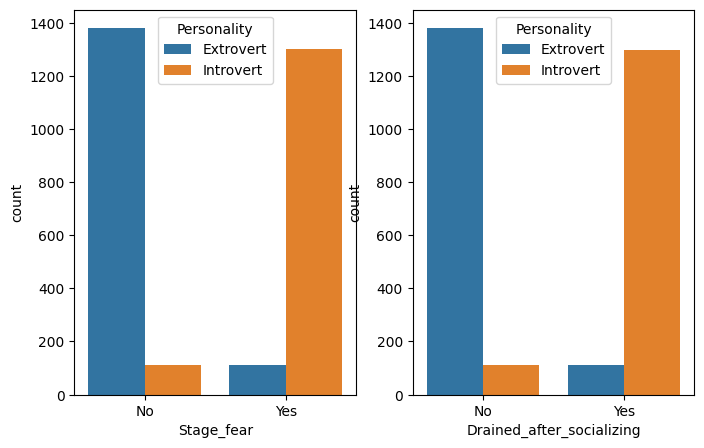

In [42]:
fig , ax = plt.subplots(1,2,figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x='Stage_fear', hue='Personality', data=df)
plt.subplot(1,2,2)
sns.countplot(x='Drained_after_socializing',hue = 'Personality',data=df)

Text(0.5, 1.0, 'Relationship Between Socializing and Drained_after_socializing')

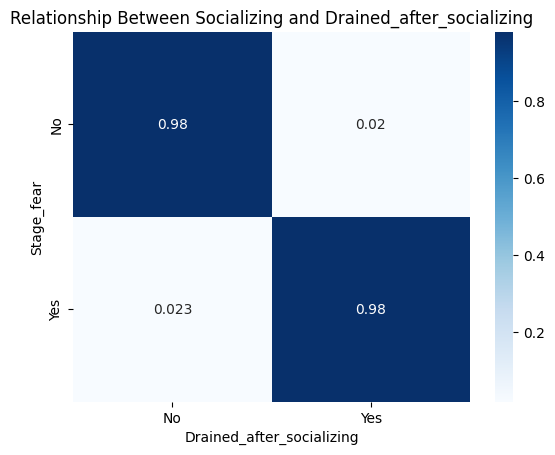

In [82]:
cross_tab = pd.crosstab(df['Stage_fear'], df['Drained_after_socializing'], normalize='index')
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Relationship Between Socializing and Drained_after_socializing')



## the stage_fear and drained after socilizing  
In this if we use the randomforest and other feature we can use it anyway but for linear models we have to drop this feature  

### 🔍 Insights from Socializing and Stage Fear Analysis

- It has been observed that **`Stage_fear`** and **`Drained_after_socializing`** are **strongly correlated**, indicating that individuals who socialize more often tend to feel more drained afterward.
- Additionally, the feature **`Stage_fear`** and **`Drained_after_socializing`** plays an important role in personality identification:
  - If a person **does not have stage fear**, they are more likely to be **extroverted**.
  - Conversely, if a person **does have stage fear**, there is a high likelihood that they are **introverted**.

In [76]:
num_features  = df.select_dtypes(include='float')
num_features.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

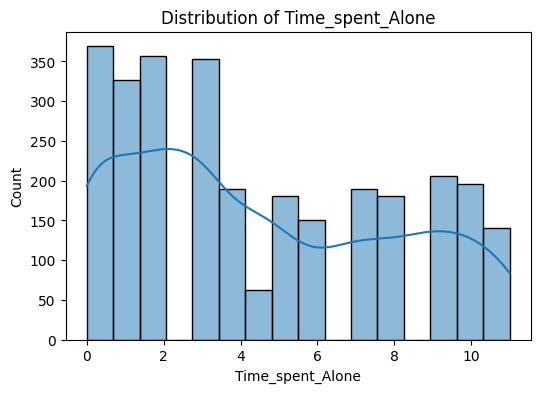

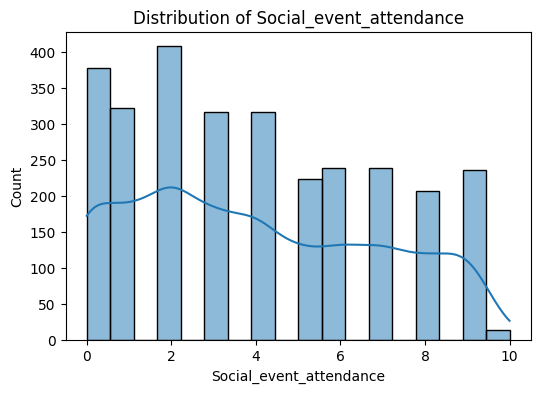

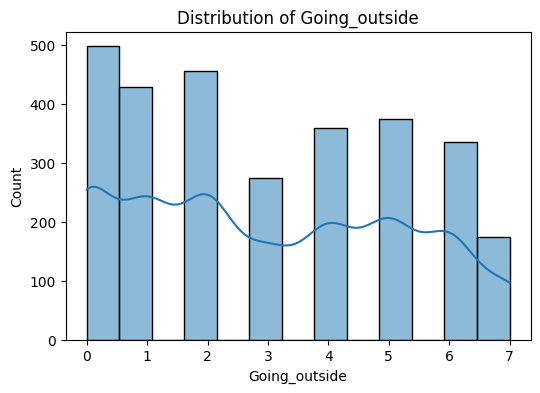

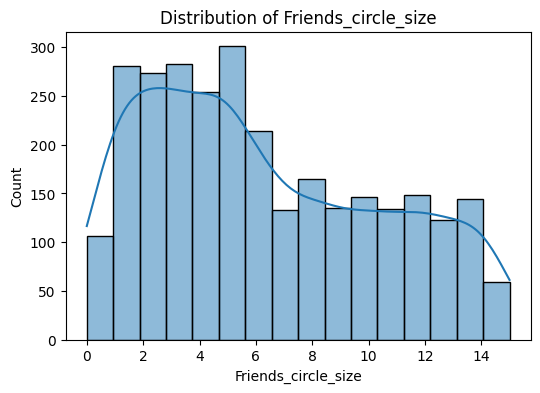

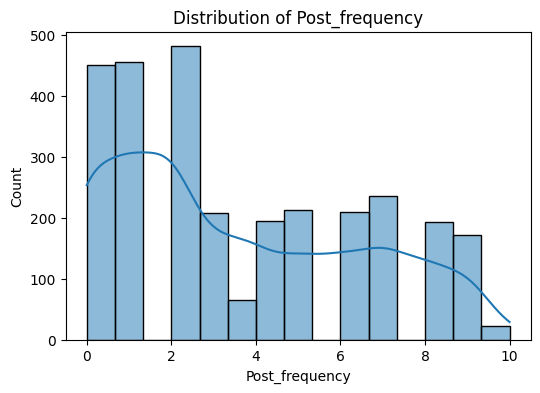

In [62]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


it has been observe all the featuers rating incrase the count of the person decrease so there is vice versa trend this can indicate a downward trend to get more infomation let deploye a scatter plot

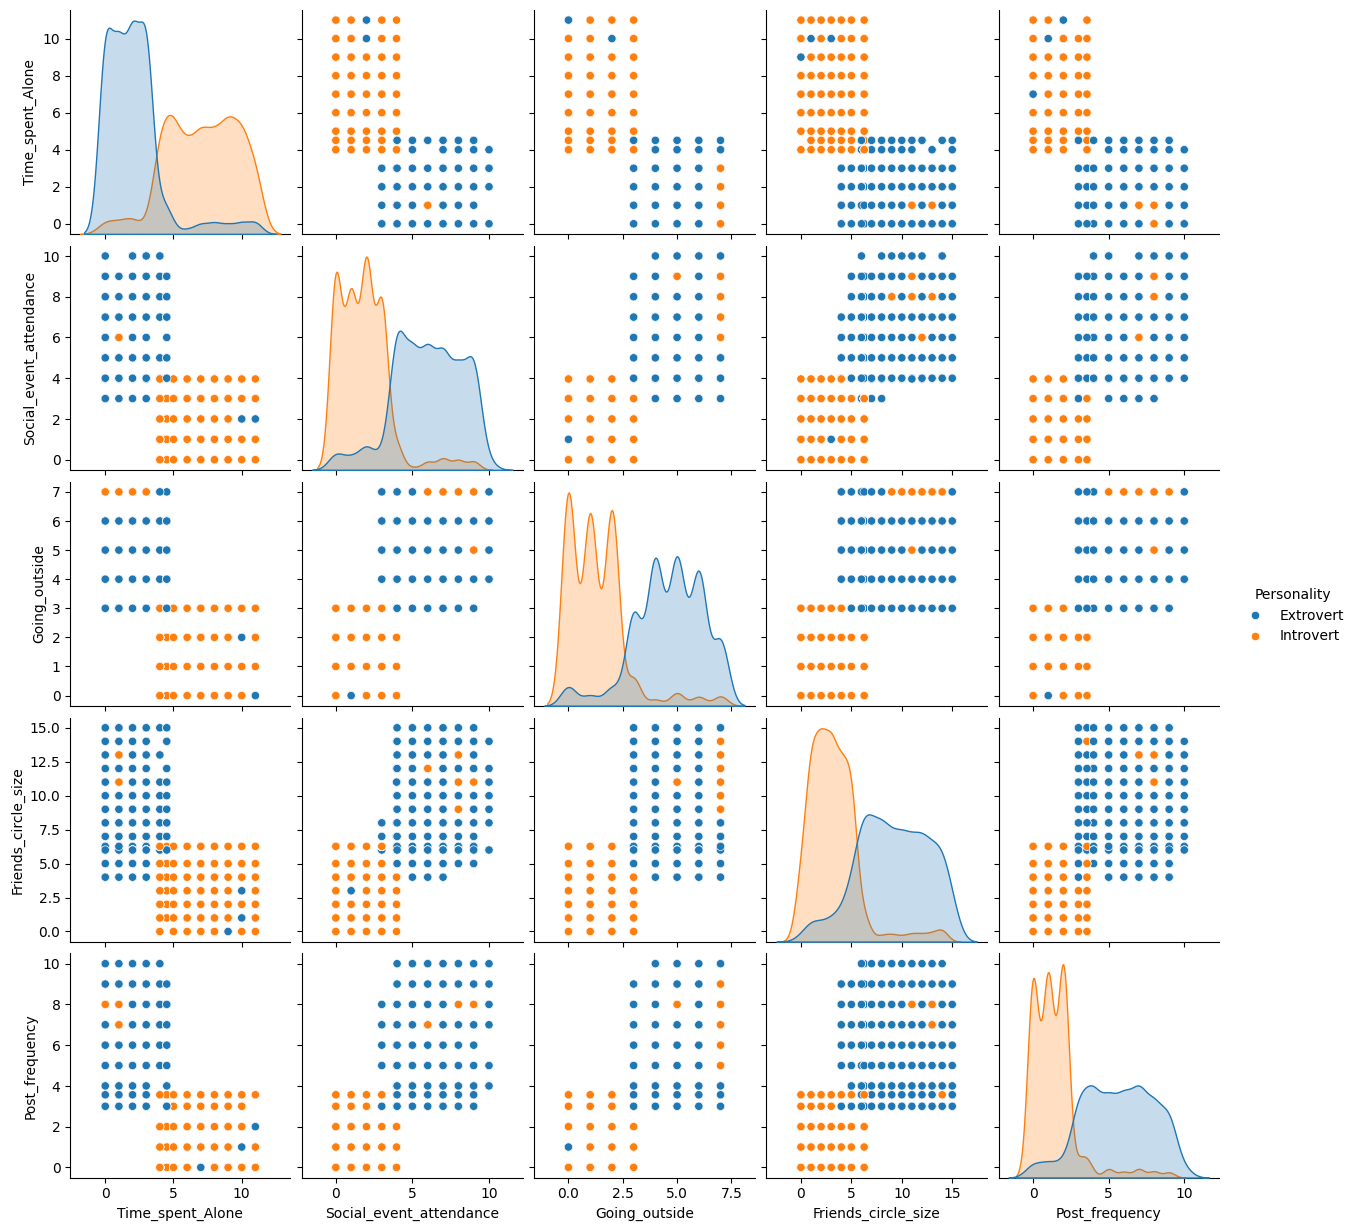

In [40]:
sns.pairplot(df,hue = 'Personality')
plt.show()

<Axes: xlabel='Time_spent_Alone', ylabel='Social_event_attendance'>

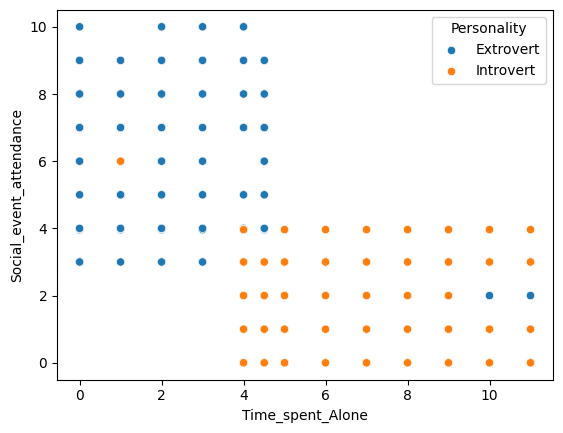

In [68]:
sns.scatterplot(x='Time_spent_Alone', y='Social_event_attendance',hue='Personality', data=df)


insight : it has been see from pari plot as well as from this plot that if time spend alone metric have higher value so there would be higher chances of be an interovert and if the social event attendance has higher value the chances of been an extrover is higher 

<Axes: xlabel='Going_outside', ylabel='Social_event_attendance'>

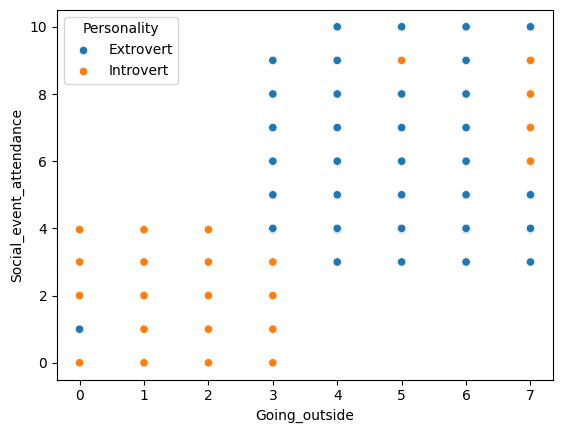

In [70]:
sns.scatterplot(x='Going_outside', y='Social_event_attendance',hue='Personality', data=df)

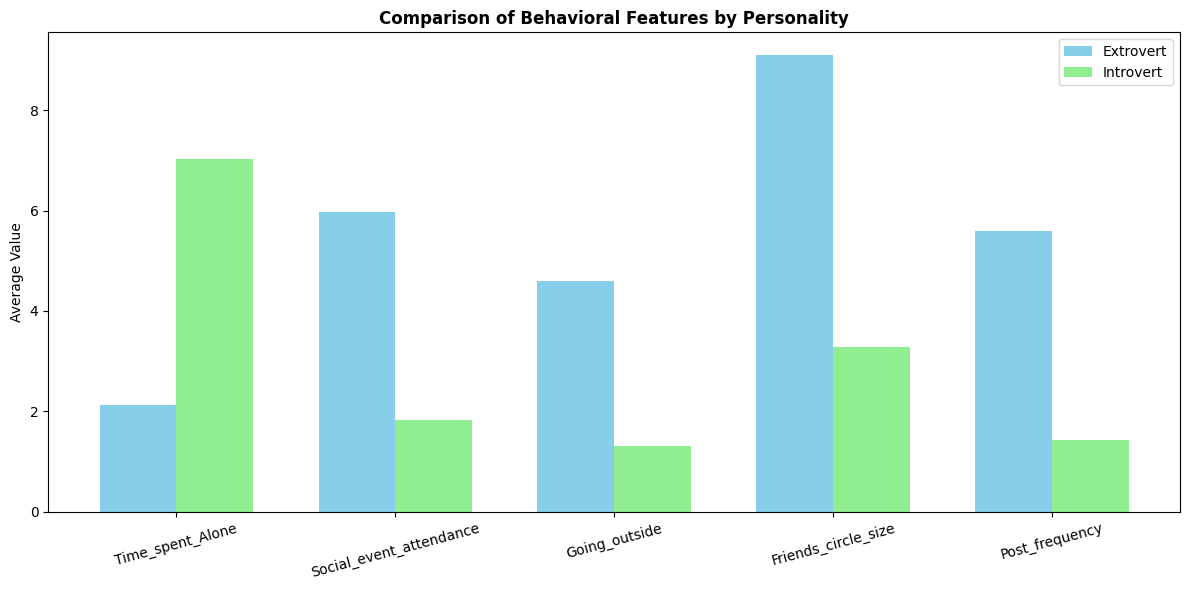

In [71]:
# Your numerical features
features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

# Group by Personality and calculate mean for each feature
grouped_means = df.groupby('Personality')[features].mean()

# Personality labels
personalities = grouped_means.index.tolist()  # ['Extrovert', 'Introvert']
n_features = len(features)
bar_width = 0.35
X_axis = np.arange(n_features)

# Plotting
plt.figure(figsize=(12, 6))

# Bars for each personality
plt.bar(X_axis - bar_width/2, grouped_means.loc[personalities[0]], width=bar_width, label=personalities[0], color='skyblue')
plt.bar(X_axis + bar_width/2, grouped_means.loc[personalities[1]], width=bar_width, label=personalities[1], color='lightgreen')

# X-axis labels and formatting
plt.xticks(X_axis, features, rotation=15)
plt.ylabel("Average Value")
plt.title("Comparison of Behavioral Features by Personality", fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


Insight : same trend is observed in all these graph  

In [77]:
sampled = df[num_features.columns].copy()
sampled = sampled.round().astype(int)


In [80]:
sampled.corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.717579,-0.735086,-0.701014,-0.717856
Social_event_attendance,-0.717579,1.000000,0.731914,0.718326,0.727827
Going_outside,-0.735086,0.731914,1.000000,0.718467,0.754057
Friends_circle_size,-0.701014,0.718326,0.718467,1.000000,0.690212
Post_frequency,-0.717856,0.727827,0.754057,0.690212,1.000000


<Axes: >

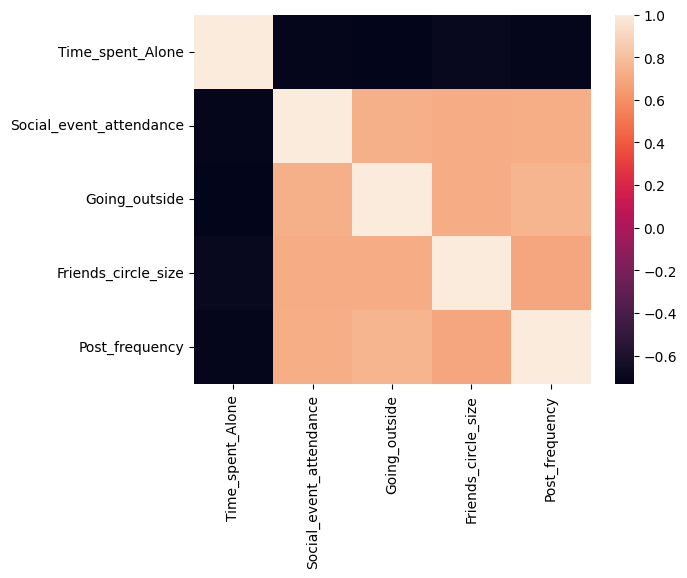

In [79]:
sns.heatmap(sampled.corr())

### 🔍 Correlation Analysis

A correlation matrix was computed to explore the relationships between numerical features in the dataset.

It was observed that most of the features show **moderate to strong positive correlations**, with correlation coefficients ranging between **0.7 and 0.75**. This indicates that several features may be capturing similar patterns or information.

Although this level of correlation is not extremely high, it suggests some **degree of redundancy** in the data. This is an important consideration for modeling, especially if linear models are used, where multicollinearity can affect interpretability and model performance.

For now, no features were dropped, as the goal is exploratory analysis. However, if dimensionality reduction or linear modeling is considered in later stages, further investigation into highly correlated feature pairs may be necessary.
